<a href="https://www.kaggle.com/code/sanjanchaudhari/facebook-analysis?scriptVersionId=137386874" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/facebook-dataset/FB.csv


In [2]:
fb=pd.read_csv("/kaggle/input/facebook-dataset/FB.csv")
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,54.119999,54.860001,53.910000,54.650002,54.650002,43076200
1,2014-01-02,54.830002,55.220001,54.189999,54.709999,54.709999,43195500
2,2014-01-03,55.020000,55.650002,54.529999,54.560001,54.560001,38246200
3,2014-01-06,54.419998,57.259998,54.049999,57.200001,57.200001,68852600
4,2014-01-07,57.700001,58.549999,57.220001,57.919998,57.919998,77207400


<center><h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >EDA - Exploratary Data Analysis</h1></center>

In [3]:
fb.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
fb.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2013-12-31   54.119999   54.860001   53.910000   54.650002   54.650002   
1     2014-01-02   54.830002   55.220001   54.189999   54.709999   54.709999   
2     2014-01-03   55.020000   55.650002   54.529999   54.560001   54.560001   
3     2014-01-06   54.419998   57.259998   54.049999   57.200001   57.200001   
4     2014-01-07   57.700001   58.549999   57.220001   57.919998   57.919998   
...          ...         ...         ...         ...         ...         ...   
1254  2018-12-24  123.099998  129.740005  123.019997  124.059998  124.059998   
1255  2018-12-26  126.000000  134.240005  125.889999  134.179993  134.179993   
1256  2018-12-27  132.440002  134.990005  129.669998  134.520004  134.520004   
1257  2018-12-28  135.339996  135.919998  132.199997  133.199997  133.199997   
1258  2018-12-31  134.449997  134.639999  129.949997  131.089996  131.089996   

       

In [5]:
fb.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
fb.index

RangeIndex(start=0, stop=1259, step=1)

In [7]:
fb = fb.replace(',', '', regex=True)

In [8]:
# Convert columns from string to integer
fb['Open'] = fb['Open'].astype(int)
fb['High'] = fb['High'].astype(int)
fb['Low'] = fb['Low'].astype(int)
fb['Close'] = fb['Close'].astype(int)
fb['Adj Close'] = fb['Adj Close'].astype(int)

<center><h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Data Visualization</h1></center>


# Create a new column 'Profit' to store the profit when the stock opens

In [9]:
fb['Profit'] = fb['Close'] - fb['Open']
fb

,Date,Open,High,Low,Close,Adj Close,Volume,Profit
0,2013-12-31,54,54,53,54,54,43076200,0
1,2014-01-02,54,55,54,54,54,43195500,0
2,2014-01-03,55,55,54,54,54,38246200,-1
3,2014-01-06,54,57,54,57,57,68852600,3
4,2014-01-07,57,58,57,57,57,77207400,0
...,...,...,...,...,...,...,...,...
1254,2018-12-24,123,129,123,124,124,22066000,1
1255,2018-12-26,126,134,125,134,134,39723400,8
1256,2018-12-27,132,134,129,134,134,31202500,2
1257,2018-12-28,135,135,132,133,133,22627600,-2


In [10]:
fb.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Profit'],
      dtype='object')

# 2.Plot the distribution of the Open prices over time to see the stock's trend:


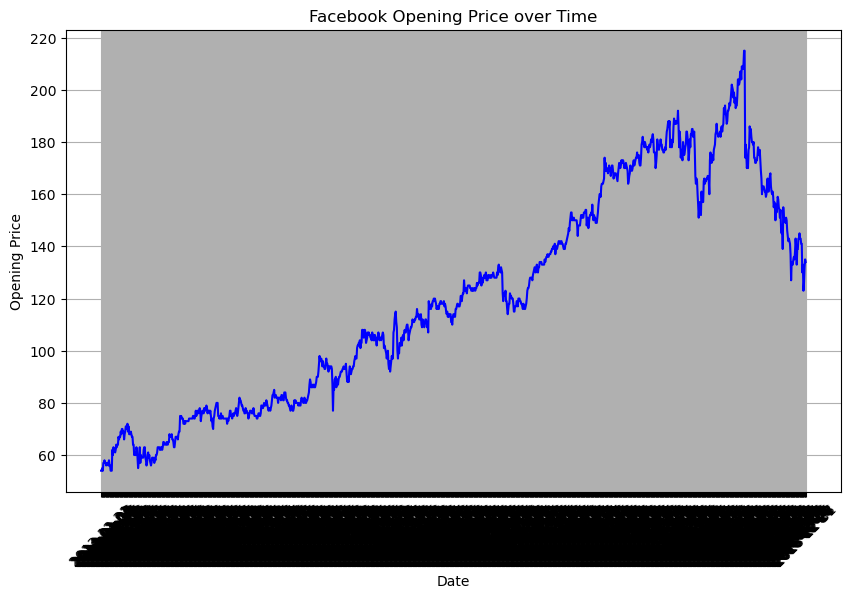

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(fb['Date'], fb['Open'], color='blue')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('Facebook Opening Price over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 3.Plot the volume of trades over time to observe any significant changes in trading activity:

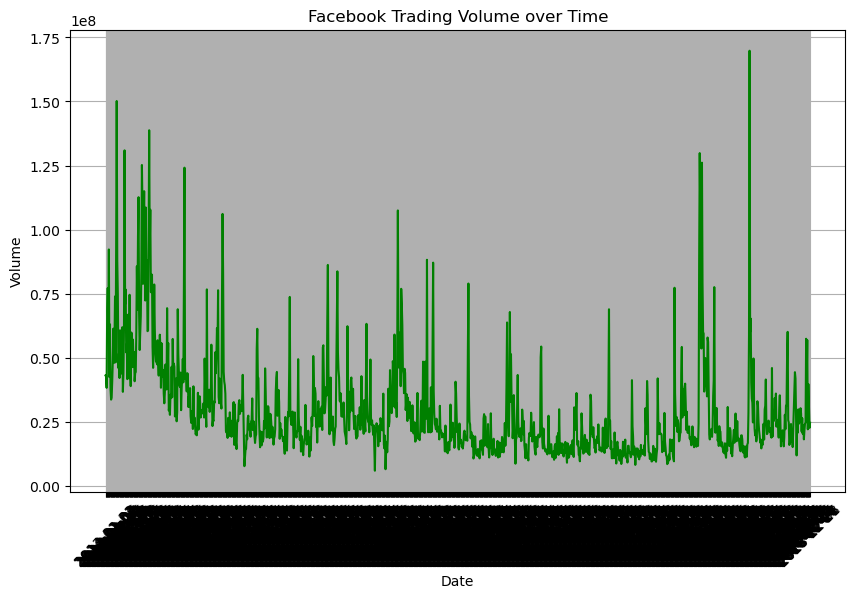

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(fb['Date'], fb['Volume'], color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Facebook Trading Volume over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4.Relationship between 'Open' and 'Close' prices for Facebook's stock.

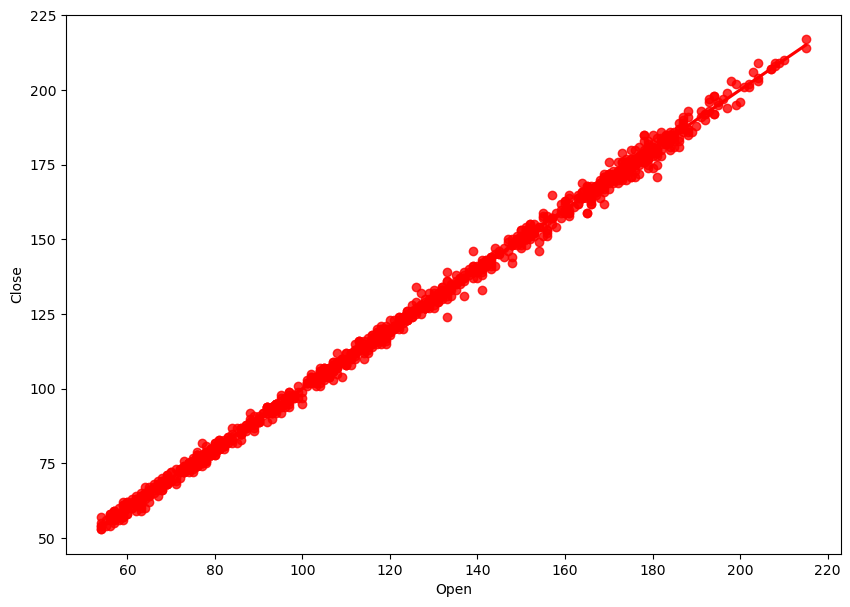

In [13]:
plt.figure(figsize=(10,7))
sns.regplot(x=fb['Open'],y=fb['Close'], color='r')
plt.show()

# 5.Histogram of the profit

<Axes: xlabel='Profit', ylabel='Count'>

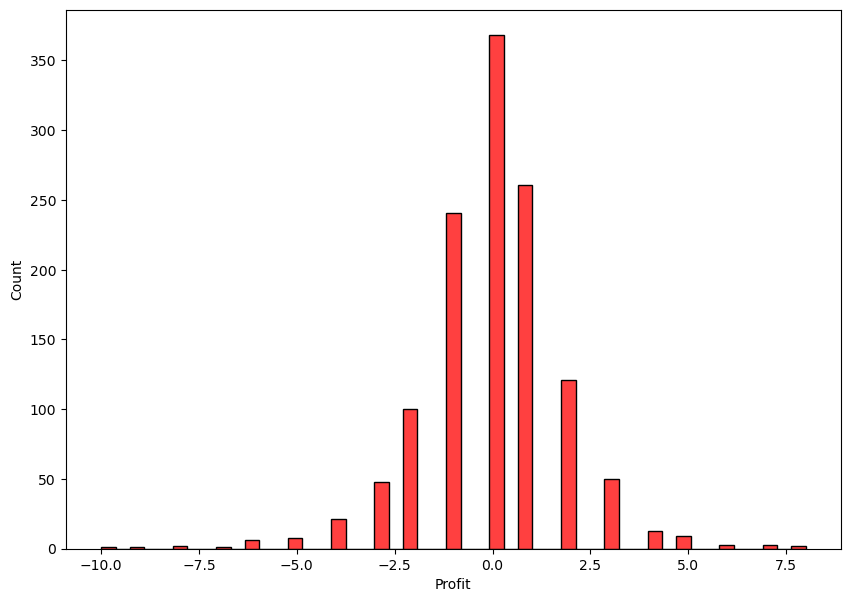

In [14]:
plt.figure(figsize=(10,7))
sns.histplot(fb['Profit'], color='r')

# 6.Open prices  distribution

/tmp/ipykernel_21/2413694642.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fb['Open'], shade=True, color='r')


<Axes: xlabel='Open', ylabel='Density'>

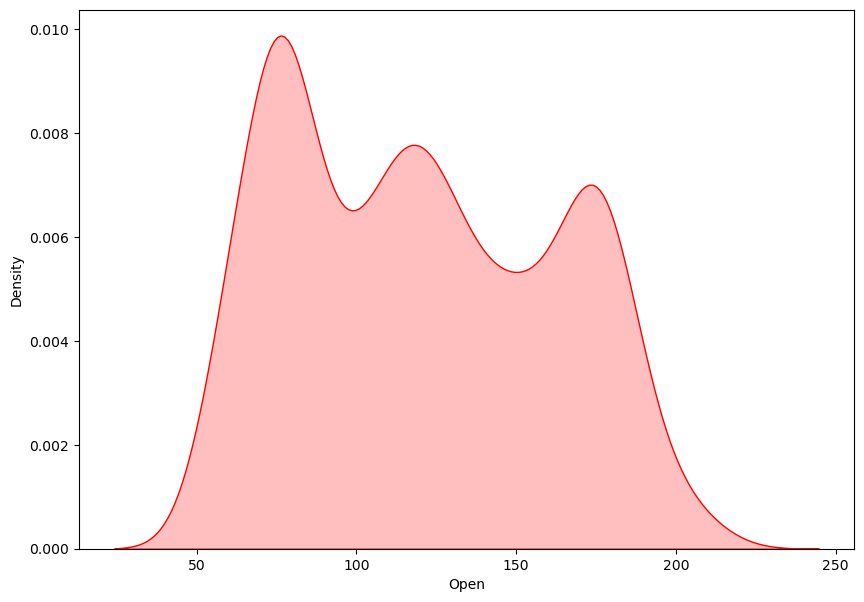

In [15]:
plt.figure(figsize=(10,7))
sns.kdeplot(fb['Open'], shade=True, color='r')

# 7. Relationship between the 'High' prices and the 'Profit' values

<Figure size 1000x700 with 0 Axes>

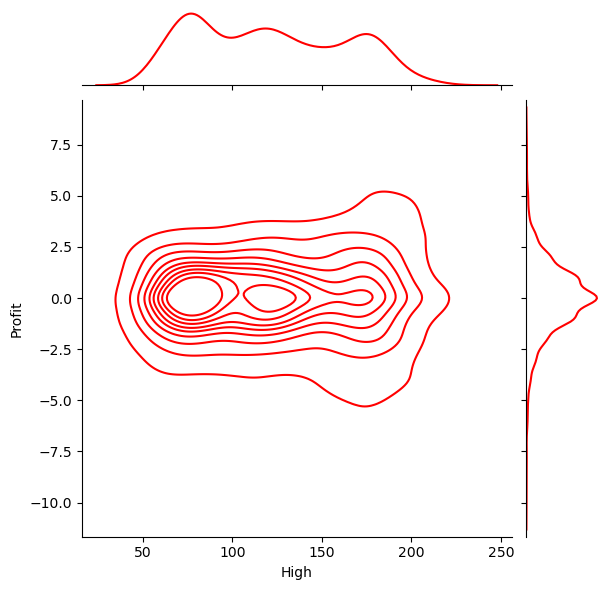

In [16]:
plt.figure(figsize=(10,7))
sns.jointplot(x=fb['High'], y=fb['Profit'], kind='kde', color='r')

# 8. plot the relationship between the profit and the opening price of Facebook's stock

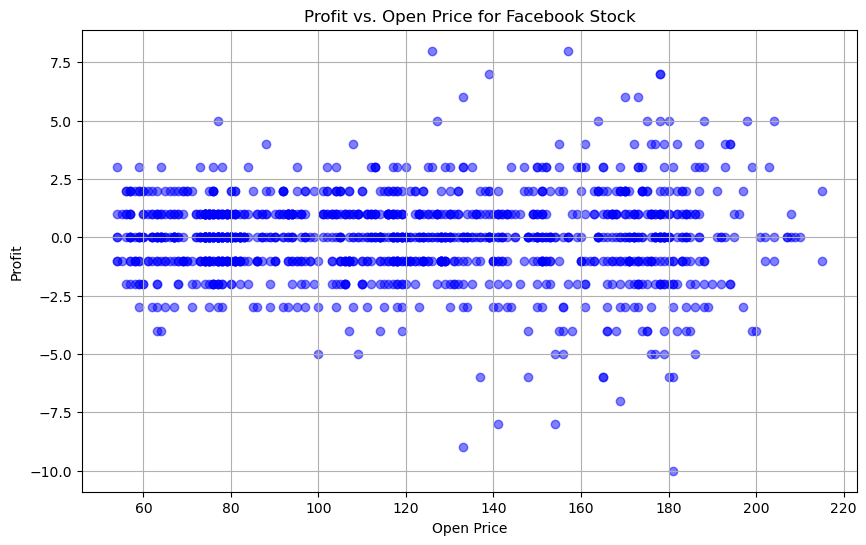

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(fb['Open'], fb['Profit'], color='b', alpha=0.5)
plt.xlabel('Open Price')
plt.ylabel('Profit')
plt.title('Profit vs. Open Price for Facebook Stock')
plt.grid(True)
plt.show()

# 9. plot the relationship between the profit and the closing price of Facebook's stock

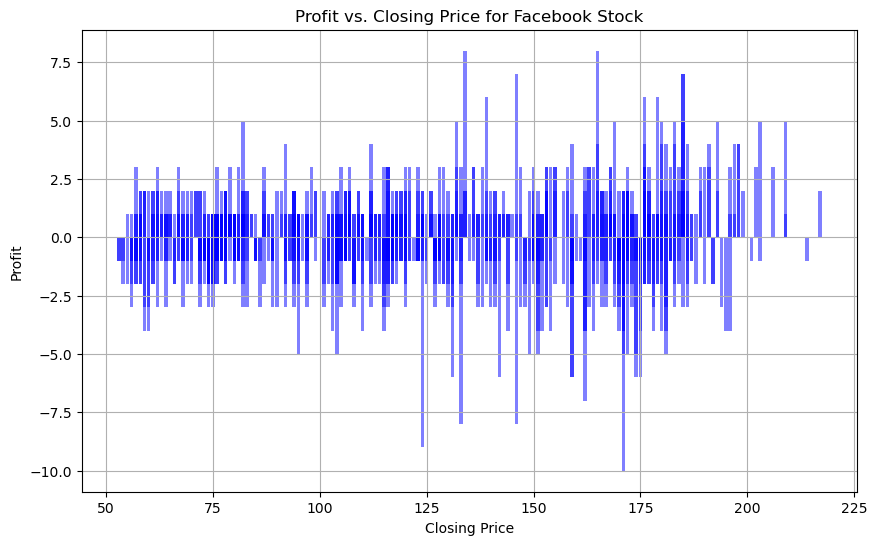

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(fb['Close'], fb['Profit'], color='b', alpha=0.5)
plt.xlabel('Closing Price')
plt.ylabel('Profit')
plt.title('Profit vs. Closing Price for Facebook Stock')
plt.grid(True)
plt.show()

# 10.create a correlation matrix

/tmp/ipykernel_21/2338476541.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_fb.corr()


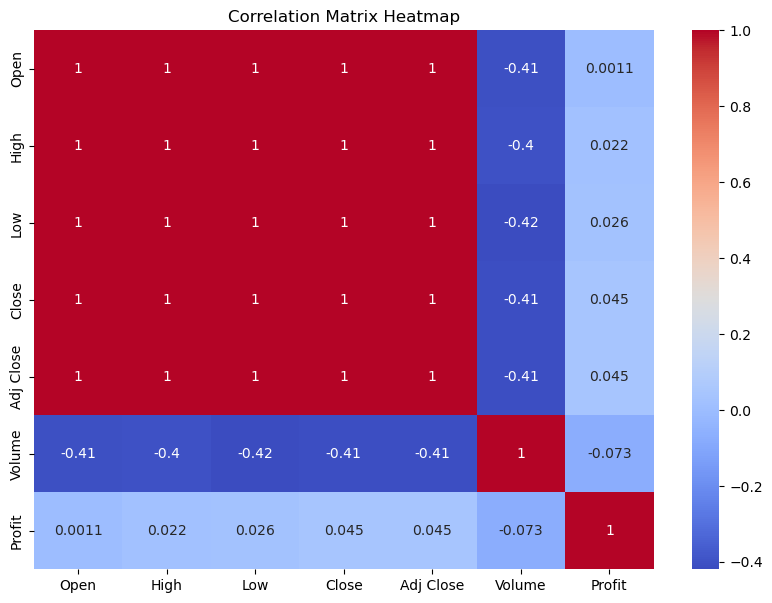

In [19]:
selected_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Profit']
subset_fb = fb[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_fb.corr()

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
fb.to_csv("facebook-dataset.csv")

<center><h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Thank You</h1></center>